### Library Imports 

In [262]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [263]:
with open('RetailSales.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
df = pd.read_csv('RetailSales.csv', encoding=encoding)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Exploratory Data Analysis 

### Drop Unnecessary Data Tables 

- We'll drop 'Country' out of our database as the only country here is United States so keep this column would yield no beneficial insights 
- We also dont need any Postal Code and Row ID to get useful insights, so we'lll drop it. 


In [264]:
df.drop(['Country', 'Postal Code','Row ID'], axis=1, inplace=True)

In [265]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

### Data Types Handling 
- To enhance the consistency, and accuracy of our data. We need to convert all data to the suitable data type. 
- In this case, we will convert 'Order Date' and 'Ship Date' to a date time data 

In [266]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
City              object
State             object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [267]:
# Convert 'orderdate' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [268]:
print("DATASET INFORMATION")
print("The Dataset has {} columns and {} rows.".format(df.shape[1], df.shape[0]))
print("The DataFrame has {} duplicated values and {} missing values.".format(df.duplicated().sum(), df.isnull().sum().sum()))
df.info()


DATASET INFORMATION
The Dataset has 18 columns and 9994 rows.
The DataFrame has 1 duplicated values and 0 missing values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   City           9994 non-null   object        
 8   State          9994 non-null   object        
 9   Region         9994 non-null   object        
 10  Product ID     9994 non-null   object        
 11  Category       9994 non-null   object        
 12  Sub-Category   9994 non-null   object        
 13  P

In [269]:
df.drop_duplicates(inplace=True)

In [270]:
d= df.describe()
d

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Insights: 
- Looking at this stastical summary, it is clear that the profit of our company is relative low compared to the sales and quantity of products sold. 
- Furthermore, the profit contains lots of negative values and the discount is really high - reaching almost 80% of the product's value, which is worth noticing. 
- In this case, we should re evaluate our pricing strategy, and other aspects of our products to increase the profit 

Text(0.5, 1.0, 'Bar plot of the count of features')

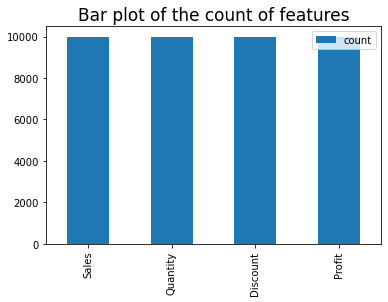

In [271]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of features",fontsize=17)

array([[<AxesSubplot:title={'center':'Order Date'}>,
        <AxesSubplot:title={'center':'Ship Date'}>],
       [<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

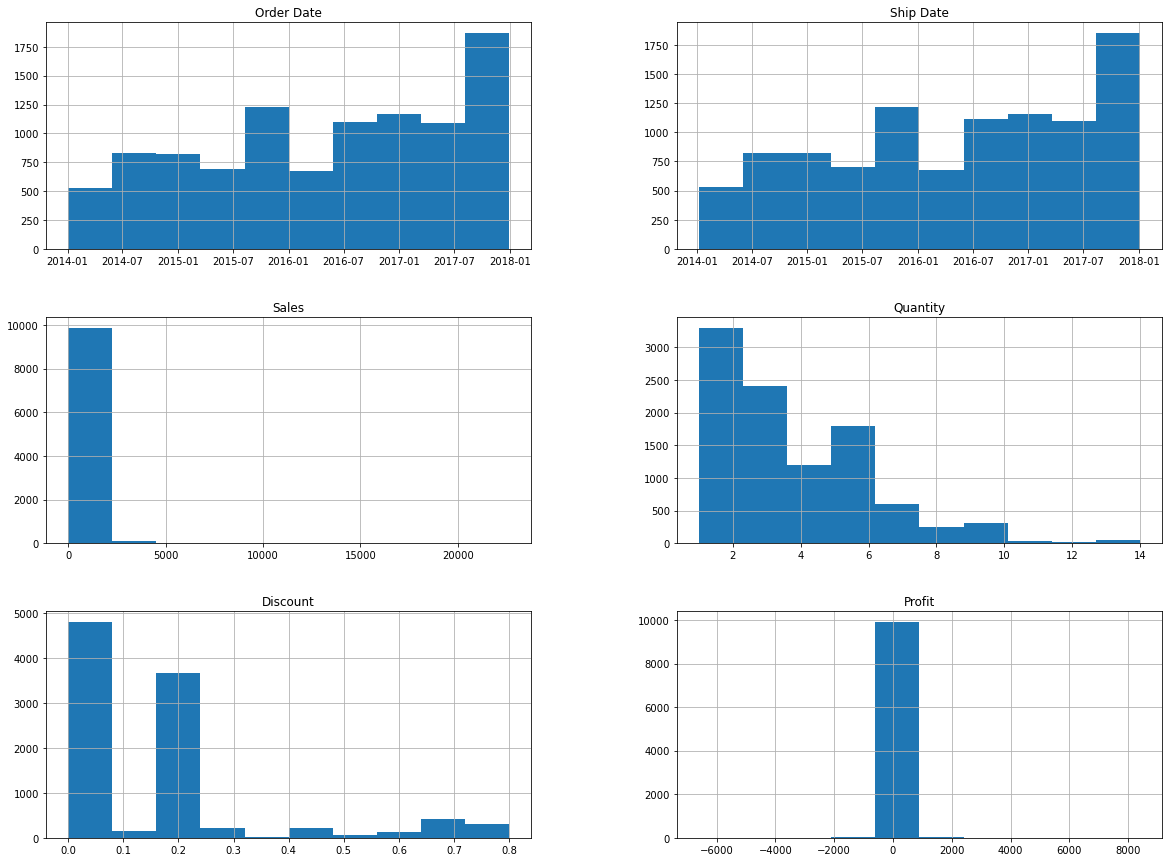

In [272]:
## histogram map 
%matplotlib inline
from matplotlib import pyplot as plt
df.hist(figsize=(20, 15))

### Histogram Intepretation: 
- It is evident that all numberic columns of our data set is not normally distributed. 
- All columns follow a right-skewed distribution, which indicates that our data may contain some outliers. 
- However to be more sure of our conclusion, we'll plot a box plot of these features, and run a Quantile Analysis 

### Boxplot & Quantile Analysis 

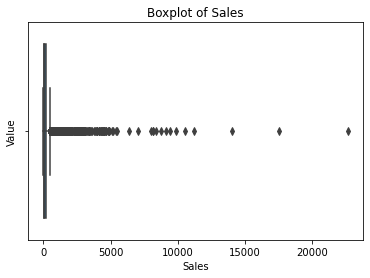

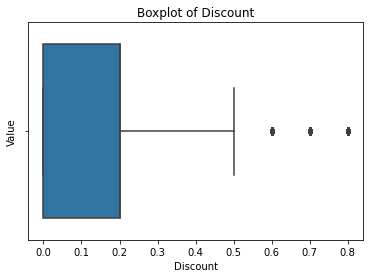

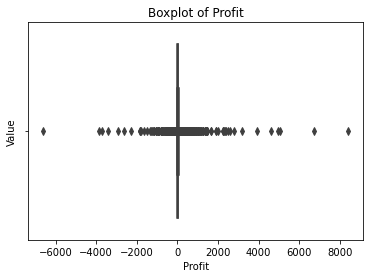

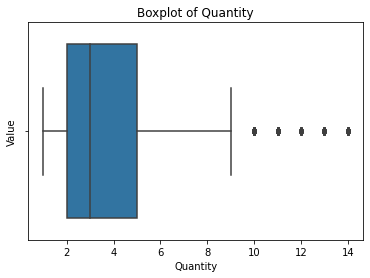

In [273]:
# boxplot for our numberical features 
feature_names=['Sales','Discount','Profit','Quantity']
for feature in feature_names:
    plt.figure()
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')

plt.show()

In [274]:
def identify_outliers(value): 
    lower_percentile = value.quantile(0.01)
    upper_percentile = value.quantile(0.99)
    outliers_percentile = value[(value < lower_percentile) | (value > upper_percentile)]
    return outliers_percentile

feature_names = ['Sales', 'Discount', 'Profit', 'Quantity']

In [275]:
for feature in feature_names:
    outliers = identify_outliers(df[feature])
    print(f"Outliers in {feature}:")
    print(outliers)

Outliers in Sales:
27      3083.430
61         1.680
75         1.248
101        1.788
165     8159.952
          ...   
9660    3023.928
9741    4404.900
9808       2.112
9857    3393.680
9929    2799.960
Name: Sales, Length: 199, dtype: float64
Outliers in Discount:
Series([], Name: Discount, dtype: float64)
Outliers in Profit:
3       -383.0310
27     -1665.0522
125     -407.6820
149      585.5520
165    -1359.9920
          ...    
9741    1013.1270
9774   -3701.8928
9857     610.8624
9929     944.9865
9948     793.7160
Name: Profit, Length: 200, dtype: float64
Outliers in Quantity:
113     14
139     14
251     13
342     13
343     12
        ..
9723    13
9732    13
9882    13
9941    14
9979    14
Name: Quantity, Length: 79, dtype: int64


### Conclusion: 
- According to the boxplots, and quantile analysis, there are a number of values that exist outside of the range of other values. However, consider that 12,13,14 is not a abnormal quantity for an order, and other so-called outliers on column Sales and Profit may help us to find out valuable insights, we'll keep it 

### Sales Performance Analysis 

### Total Orders 

In [276]:
total_orders = df.shape[0]
print(f"Total Orders: {total_orders}")

Total Orders: 9993


In [277]:
distinct_orders = df['Order ID'].nunique()
print(f"Distinct Orders: {distinct_orders}")

Distinct Orders: 5009


### Insight: 
- The total of orders, and distinct orders are far different from each other. This could be explained by several reasons.

- Multiple Items per Order: Each Order ID might represent multiple items purchased in a single order. Each item might be listed as a separate row in your dataset, resulting in multiple rows with the same Order ID.

- Split Shipments or Deliveries: Orders might be split into multiple shipments or deliveries, where each shipment or delivery is recorded as a separate row with the same Order ID

In [278]:
orders_grouped = df.groupby('Order ID').size().reset_index(name='count')

In [279]:
print(orders_grouped)

            Order ID  count
0     CA-2014-100006      1
1     CA-2014-100090      2
2     CA-2014-100293      1
3     CA-2014-100328      1
4     CA-2014-100363      2
...              ...    ...
5004  US-2017-168802      1
5005  US-2017-169320      2
5006  US-2017-169488      2
5007  US-2017-169502      2
5008  US-2017-169551      6

[5009 rows x 2 columns]


In [280]:
multiple_entries = orders_grouped[orders_grouped['count'] > 1]
for order_id in multiple_entries['Order ID'].head(10):  
    print(f"Order ID: {order_id}")
    sample_order = df[df['Order ID'] == order_id]
    print(sample_order[['Product ID', 'Quantity', 'Sales', 'Ship Date','Order Date']])
    print("-----------------------------------------")

Order ID: CA-2014-100090
           Product ID  Quantity    Sales  Ship Date Order Date
6287  FUR-TA-10003715         3  502.488 2014-07-12 2014-07-08
6288  OFF-BI-10001597         6  196.704 2014-07-12 2014-07-08
-----------------------------------------
Order ID: CA-2014-100363
           Product ID  Quantity   Sales  Ship Date Order Date
3835  OFF-FA-10000611         2   2.368 2014-04-15 2014-04-08
3836  OFF-PA-10004733         3  19.008 2014-04-15 2014-04-08
-----------------------------------------
Order ID: CA-2014-100678
           Product ID  Quantity    Sales  Ship Date Order Date
6568  OFF-AR-10001868         2    2.688 2014-04-22 2014-04-18
6569  FUR-CH-10002602         3  317.058 2014-04-22 2014-04-18
6570  OFF-EN-10000056         3  149.352 2014-04-22 2014-04-18
6571  TEC-AC-10000474         3  227.976 2014-04-22 2014-04-18
-----------------------------------------
Order ID: CA-2014-100706
           Product ID  Quantity  Sales  Ship Date Order Date
9019  TEC-AC-10001314  

### Conclusion: 


### Correlation Heatmap 

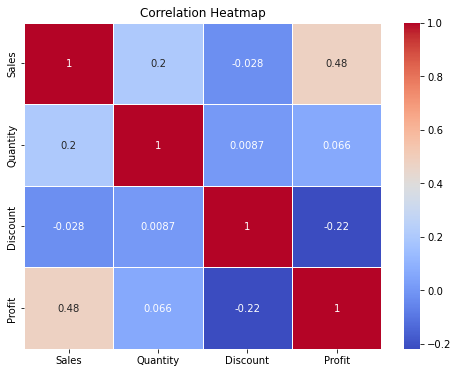

In [281]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Insights: 
- From the given heatmap, we can see that discount has a postive pearson coefficient with both Sales, and profit, which indidcates that we need to come up with a different pricing & discount strategy, as the current discount strategy is pulling both of our sales and profit down. 
- Besides that, we're currently not making much profit as our sales only contributes to nearly a half of our profit. 

### Profit Margin 
- In order to get a better idea of how our business is working, to be more specifically, how efficient we are in converting sales into profits, we'll calculate the profit margin for each product. 

In [282]:
# Calculate profit margin
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) 

In [283]:
df.describe()

,Sales,Quantity,Discount,Profit,Profit Margin (%)
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971,0.120330
std,623.276074,2.225149,0.206457,234.271476,0.466775
min,0.444000,1.000000,0.000000,-6599.978000,-2.750000
25%,17.280000,2.000000,0.000000,1.731000,0.075000
50%,54.480000,3.000000,0.200000,8.671000,0.270000
75%,209.940000,5.000000,0.200000,29.364000,0.362500
max,22638.480000,14.000000,0.800000,8399.976000,0.500000


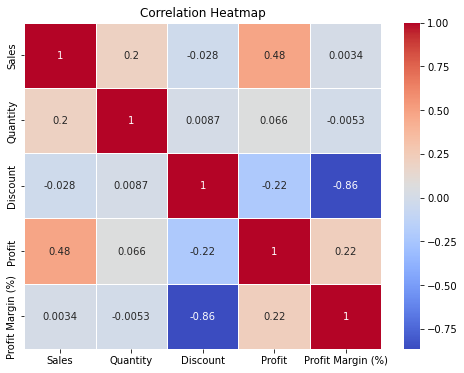

In [284]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Insight: 
- It's evident that the discount policy is not bringing any good here, as it takes away more than 80% of our profit margin, which indicates that for every product we sold, we only earn 20% of the product value. 

### Top 10 Best Sellers


In [285]:
# Sort by Sales in descending order and select top 10 best sellers
top_10_sellers = df.nlargest(10, 'Sales')

# Sort by Profit Margin (%) in descending order and select top 10
top_10_profit_margin = df.nlargest(10, 'Profit Margin (%)')

# Drop duplicates based on 'Product Name'
top_10_sellers_unique = top_10_sellers.drop_duplicates(subset=['Product Name'])

# Drop duplicates based on 'Product Name'
top_10_profit_margin_unique = top_10_profit_margin.drop_duplicates(subset=['Product Name'])

# Display top 10 best sellers with unique product names
print("Top 10 Best Sellers:")
print(top_10_sellers_unique[['Product Name', 'Sales']])

# Display top 10 products with highest profit margin with unique product names
print("\nTop 10 Products with Highest Profit Margin:")
print(top_10_profit_margin_unique[['Product Name', 'Profit Margin (%)']])

Top 10 Best Sellers:
                                           Product Name     Sales
2697  Cisco TelePresence System EX90 Videoconferenci...  22638.48
6826              Canon imageCLASS 2200 Advanced Copier  17499.95
9039   GBC Ibimaster 500 Manual ProClick Binding System   9892.74
4098               Ibico EPK-21 Electric Binding System   9449.95
4277   3D Systems Cube Printer, 2nd Generation, Magenta   9099.93
8488  HP Designjet T520 Inkjet Large Format Printer ...   8749.95

Top 10 Products with Highest Profit Margin:
                                          Product Name  Profit Margin (%)
61                         Prang Dustless Chalk Sticks                0.5
246  Adams Telephone Message Book w/Frequently-Call...                0.5
318  Canon imageCLASS MF7460 Monochrome Digital Las...                0.5
322                                   OIC Binder Clips                0.5
381                   Southworth Structures Collection                0.5
484             Alphabetical

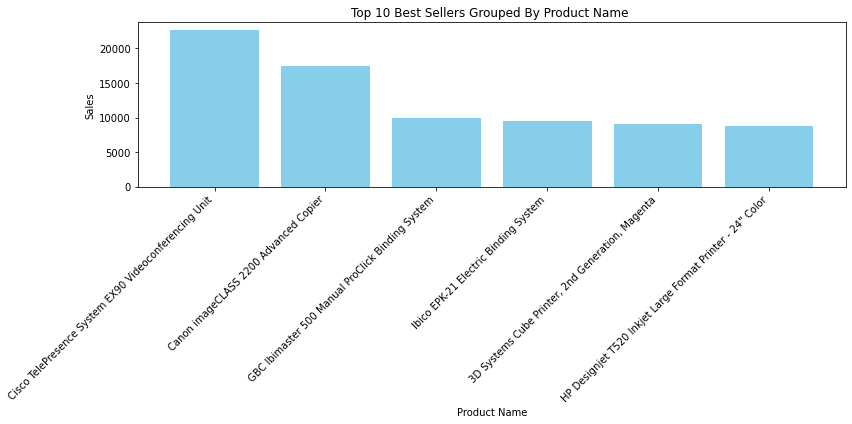

In [286]:
# Plotting top 10 best sellers grouped by product name 
plt.figure(figsize=(12, 6))
plt.bar(top_10_sellers['Product Name'], top_10_sellers['Sales'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.title('Top 10 Best Sellers Grouped By Product Name ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 10 Products With Highest Profit Margin 

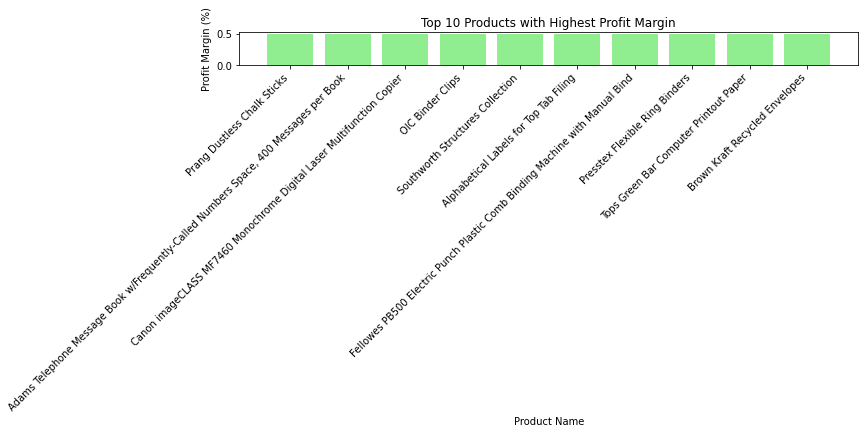

In [287]:
# Plotting top 10 products with highest profit margin
plt.figure(figsize=(12, 6))
plt.bar(top_10_profit_margin['Product Name'], top_10_profit_margin['Profit Margin (%)'], color='lightgreen')
plt.xlabel('Product Name')
plt.ylabel('Profit Margin (%)')
plt.title('Top 10 Products with Highest Profit Margin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Revenue Distribution By Product Category Over Time 

In [288]:
# extract month & year from order date 
df['YearMonth'] = df['Order Date'].dt.to_period('M')

In [289]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin (%),YearMonth
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,2016-11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,2016-11
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,2016-06
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,2015-10
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,2015-10


In [290]:
df.dtypes

Order ID                     object
Order Date           datetime64[ns]
Ship Date            datetime64[ns]
Ship Mode                    object
Customer ID                  object
Customer Name                object
Segment                      object
City                         object
State                        object
Region                       object
Product ID                   object
Category                     object
Sub-Category                 object
Product Name                 object
Sales                       float64
Quantity                      int64
Discount                    float64
Profit                      float64
Profit Margin (%)           float64
YearMonth                 period[M]
dtype: object

In [291]:
df['Year'] = df['Order Date'].dt.year

### Profit Distribution By Product Category Over Time 

In [292]:
# Group by Year and Month-Year, and calculate the mean Profit
profit_by_month_year = df.groupby(['Year', 'YearMonth','Category'])['Profit'].mean().reset_index()

In [293]:
# Get the list of unique years
years = profit_by_month_year['Year'].unique()

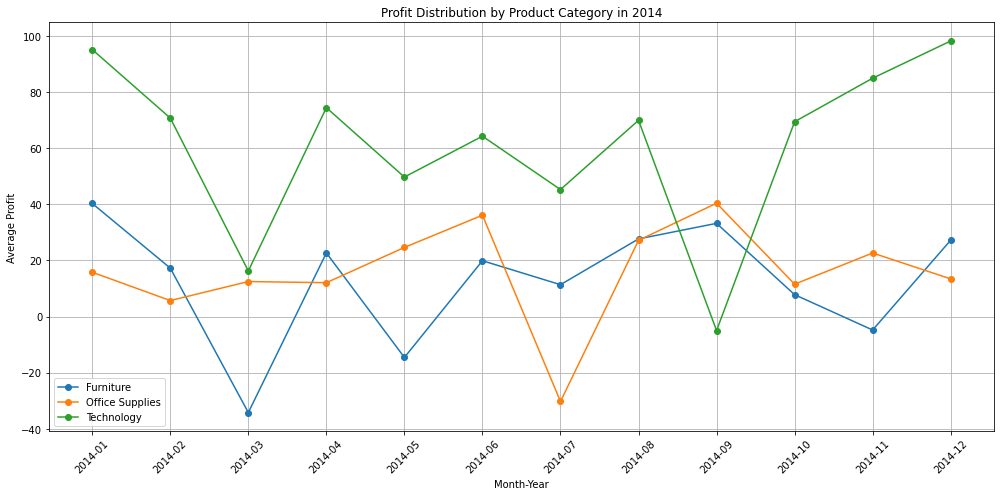

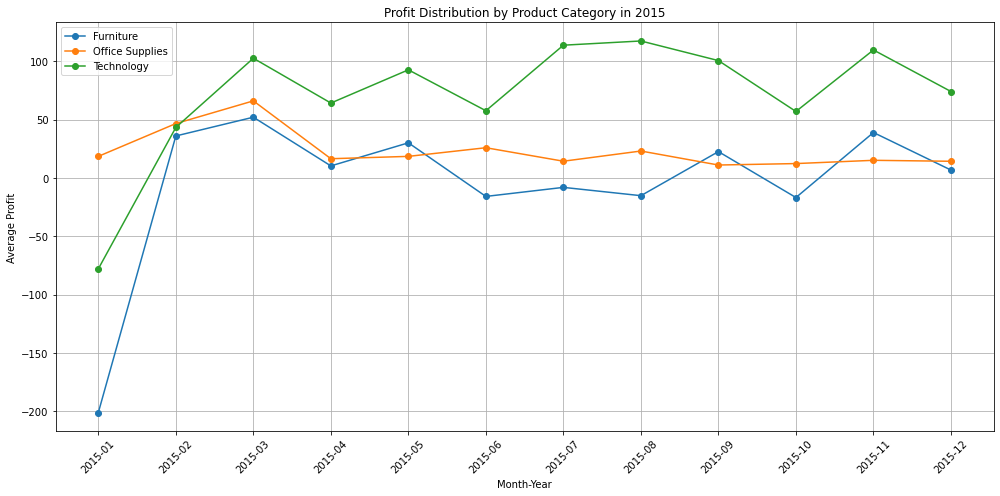

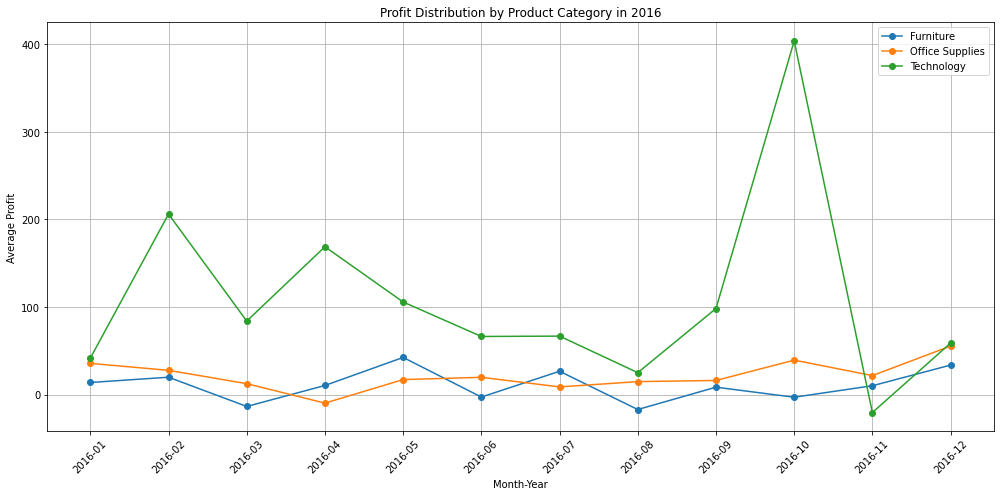

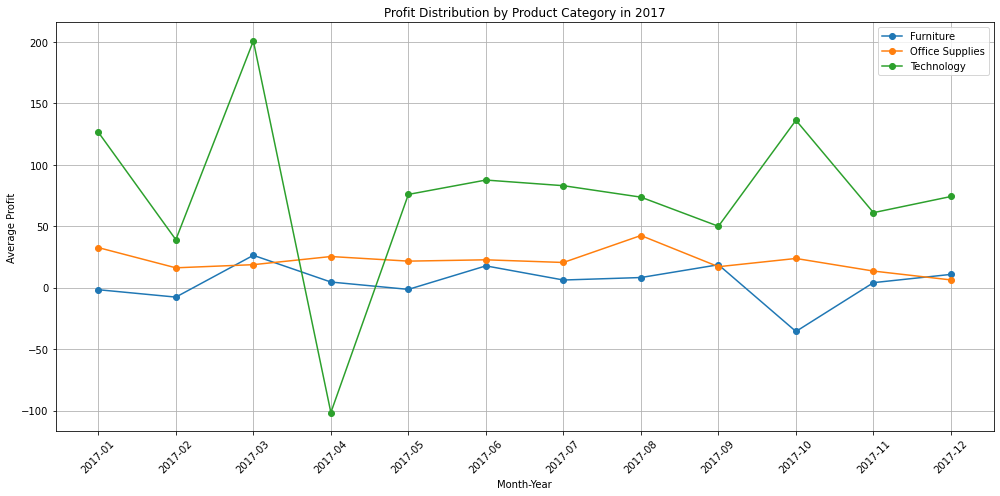

In [295]:
for year in years:
    plt.figure(figsize=(14, 7))
    yearly_data = profit_by_month_year[profit_by_month_year['Year'] == year]
    
    # Plot each category separately
    for category in df['Category'].unique():
        category_data = yearly_data[yearly_data['Category'] == category]
        plt.plot(category_data['YearMonth'].astype(str), category_data['Profit'], marker='o', linestyle='-', label=category)
    
    plt.title(f'Profit Distribution by Product Category in {year}')
    plt.xlabel('Month-Year')
    plt.ylabel('Average Profit')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Revenue Distribution By Category 

In [296]:
# Group by Year and Month-Year, and calculate the mean Profit
sales_by_month_year = df.groupby(['Year', 'YearMonth','Category'])['Sales'].mean().reset_index()

In [297]:
# Get the list of unique years
years = sales_by_month_year['Year'].unique()

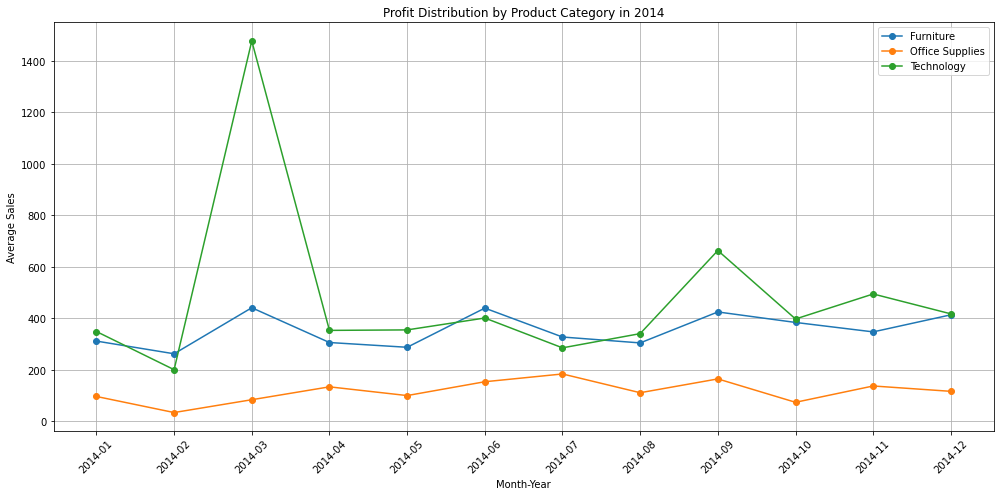

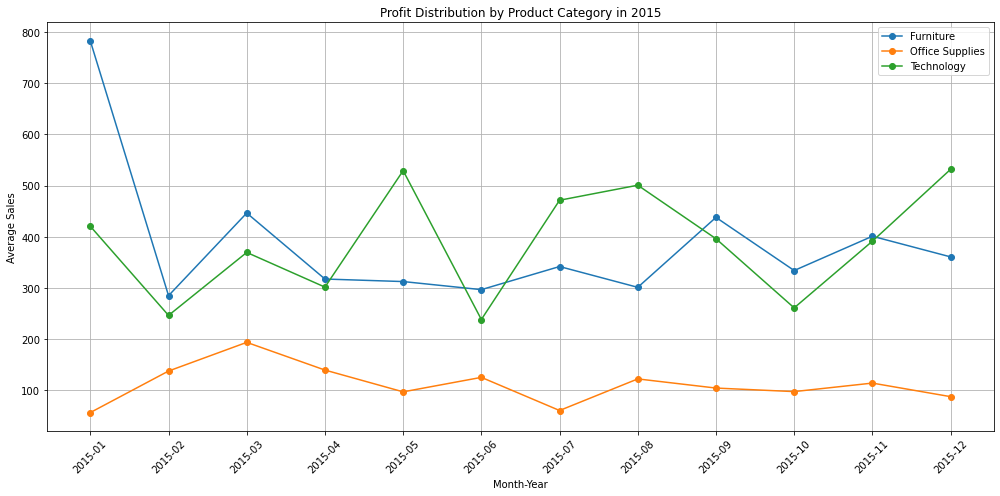

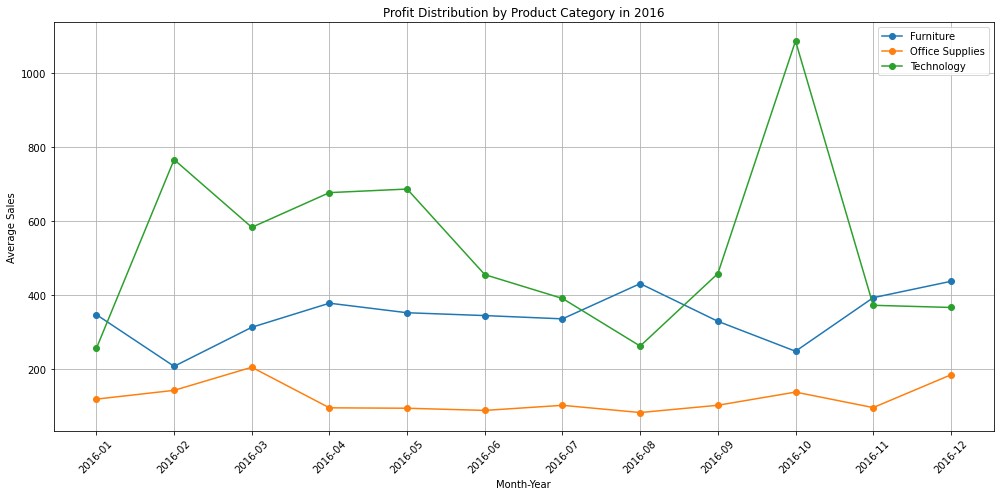

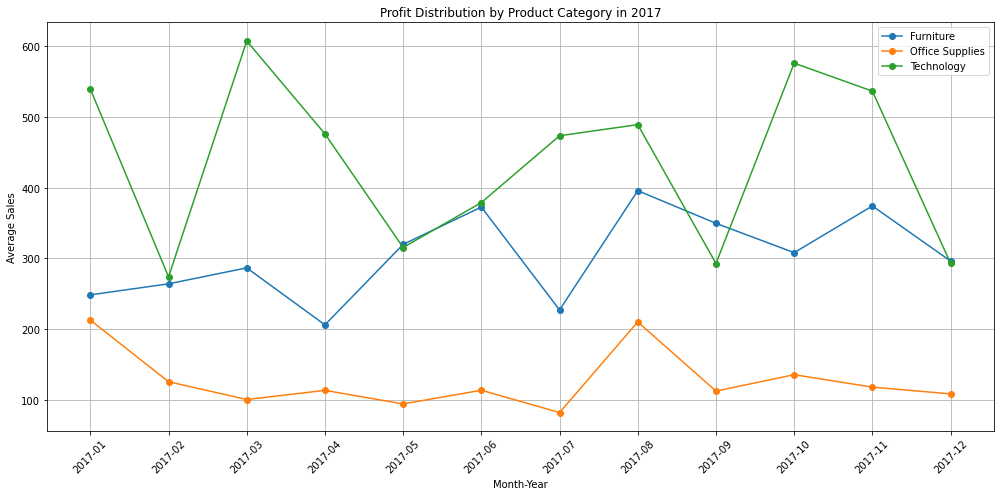

In [298]:
for year in years:
    plt.figure(figsize=(14, 7))
    yearly_data = sales_by_month_year[sales_by_month_year['Year'] == year]
    
    # Plot each category separately
    for category in df['Category'].unique():
        category_data = yearly_data[yearly_data['Category'] == category]
        plt.plot(category_data['YearMonth'].astype(str), category_data['Sales'], marker='o', linestyle='-', label=category)
    
    plt.title(f'Profit Distribution by Product Category in {year}')
    plt.xlabel('Month-Year')
    plt.ylabel('Average Sales')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Revenue Contribution By Category 

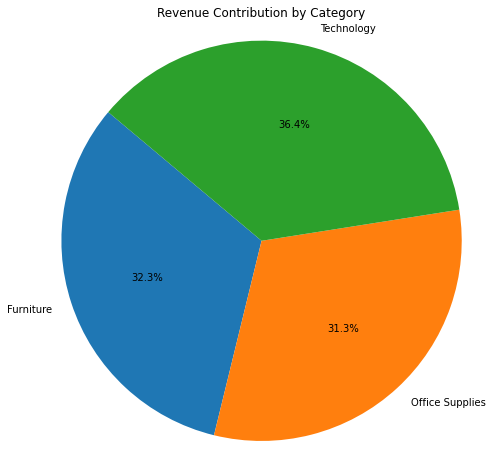

In [299]:
# Calculate total sales for each category
category_sales = df.groupby('Category')['Sales'].sum()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Contribution by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Revenue Contribution By Sub Category 

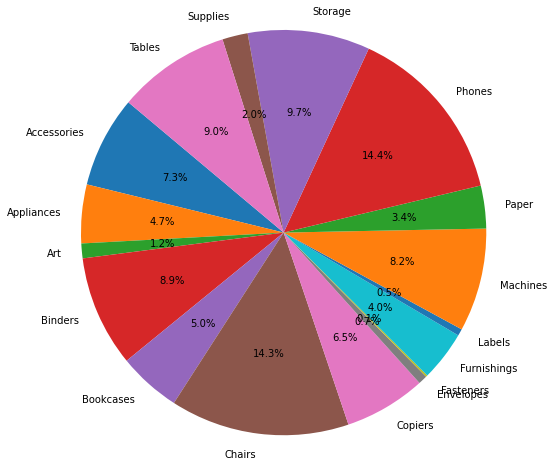

In [300]:
# Calculate total sales for each category
category_sales = df.groupby('Sub-Category')['Sales'].sum()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Profit Contribution By Category 

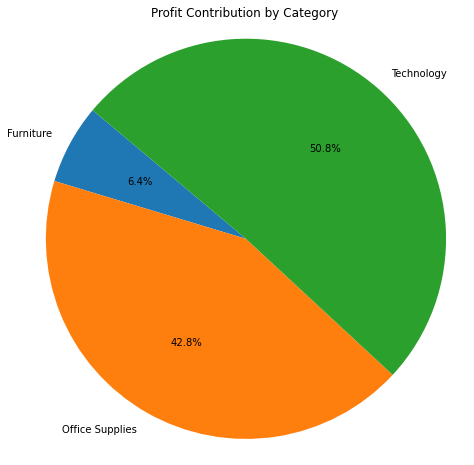

In [301]:
# Calculate total sales for each category
category_sales = df.groupby('Category')['Profit'].sum()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Profit Contribution by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Profit Contribution By Sub Category 

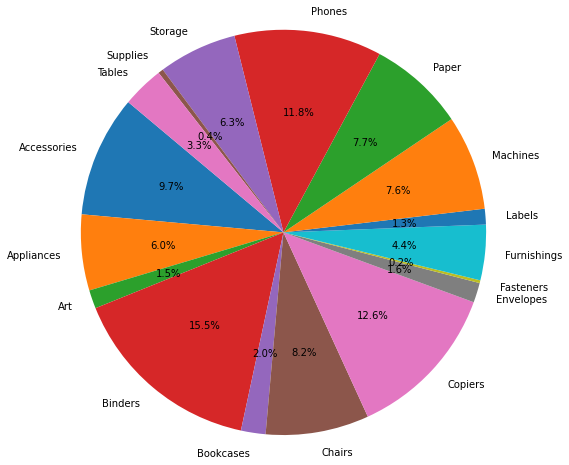

In [302]:
# Clean data: remove negative values or replace with appropriate handling
df['Profit'] = df['Profit'].clip(lower=0)  # Clip negative values to zero

# Calculate total profit for each sub-category
category_sales = df.groupby('Sub-Category')['Profit'].sum()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Average Delivery Time
-  Shorter delivery times often lead to higher customer satisfaction. Satisfied customers are more likely to return for future purchases
- In this case, we'll analyze the average delivery time for each ship mode, and then try to optimize the delivery time by choosing the ship mode with shortest delivery time 

In [303]:
# Calculate delivery time (in days)
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Calculate average delivery time
average_delivery_time = df['Delivery Time'].mean()

print(f"Average Delivery Time: {average_delivery_time} days")

Average Delivery Time: 3.9581707195036526 days


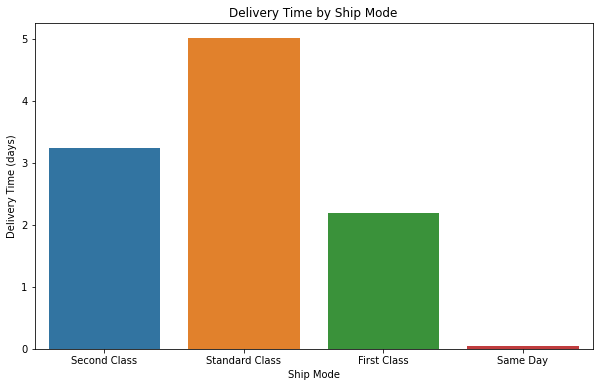

In [304]:
# Plotting delivery time by ship mode
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Delivery Time', data=df, ci=None)
plt.title('Delivery Time by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Delivery Time (days)')
plt.show()

### RFM ANALYSIS 

- We'll look for three main aspects: Recency- Frequency- Monetary. 
- Recency: How long from the last purchases? 
- Frequency: How many orders this customer has placed? 
- Monetary: How many money they have spent on our products?
- RFM will helps us to segment our customers into cohorts, which help us to grab a better understanding of our customers, and hence, we'll come up a better customer service strategy. 
- In this case, we will identify high-value customers (who purchase frequently and spend more), potential loyal customers, and at-risk customers (who haven't made a purchase in a while).

In [305]:
# caculate recency for all customers 
snapshot_date = pd.to_datetime('2024-07-10')
df['Recency']=(snapshot_date - df.groupby('Customer ID')['Order Date'].transform('max')).dt.days

In [306]:
# Display the results
print(df[['Customer ID', 'Order Date', 'Recency']].head())

  Customer ID Order Date  Recency
0    CG-12520 2016-11-08     2722
1    CG-12520 2016-11-08     2722
2    DV-13045 2016-06-12     2403
3    SO-20335 2015-10-11     2413
4    SO-20335 2015-10-11     2413


In [307]:
# caculate frequency for all customers
df['Frequency']= df.groupby('Customer ID')['Order ID'].transform('count')

In [308]:
# Display the results
print(df[['Customer ID', 'Frequency']].head())

  Customer ID  Frequency
0    CG-12520          5
1    CG-12520          5
2    DV-13045          9
3    SO-20335         15
4    SO-20335         15


In [309]:
# caculate monetary for all customers 
df['Monetary']= df.groupby('Customer ID')['Sales'].transform('sum')

In [310]:
# Display the results
print(df[['Customer ID', 'Monetary']].head())

  Customer ID   Monetary
0    CG-12520  1148.7800
1    CG-12520  1148.7800
2    DV-13045  1119.4830
3    SO-20335  2602.5755
4    SO-20335  2602.5755


In [311]:
df.describe()

,Sales,Quantity,Discount,Profit,Profit Margin (%),Year,Delivery Time,Recency,Frequency,Monetary
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,44.283829,0.120330,2015.722406,3.958171,2504.277895,15.687882,3592.907579
std,623.276074,2.225149,0.206457,193.131299,0.466775,1.123479,1.747654,154.848521,6.652109,2837.729644
min,0.444000,1.000000,0.000000,0.000000,-2.750000,2014.000000,0.000000,2384.000000,1.000000,4.833000
25%,17.280000,2.000000,0.000000,1.731000,0.075000,2015.000000,3.000000,2412.000000,11.000000,1669.135000
50%,54.480000,3.000000,0.200000,8.671000,0.270000,2016.000000,4.000000,2444.000000,15.000000,2872.630000
75%,209.940000,5.000000,0.200000,29.364000,0.362500,2017.000000,5.000000,2530.000000,20.000000,4704.304000
max,22638.480000,14.000000,0.800000,8399.976000,0.500000,2017.000000,7.000000,3549.000000,37.000000,25043.050000


In [312]:
# divide each value into 4 equal bins 
df['R_score'] = pd.qcut(df['Recency'], q=4, labels=False, duplicates='drop') + 1  # Recency score (1 to 4)
df['F_score'] = pd.qcut(df['Frequency'], q=4, labels=False, duplicates='drop') + 1  # Frequency score (1 to 4)
df['M_score'] = pd.qcut(df['Monetary'], q=4, labels=False, duplicates='drop') + 1  # Monetary score (1 to 4)

In [313]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Profit Margin (%)', 'YearMonth', 'Year',
       'Delivery Time', 'Recency', 'Frequency', 'Monetary', 'R_score',
       'F_score', 'M_score'],
      dtype='object')

In [314]:
df['RFM_Score'] = df['R_score'].astype(str) + df['F_score'].astype(str) + df['M_score'].astype(str)

# Display the segmented customers
print(df[['Customer ID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']].sort_values(by='RFM_Score'))

     Customer ID  Recency  Frequency   Monetary RFM_Score
2175    PB-18805     2409         10    740.356       111
756     DC-13285     2407          7   1174.618       111
5837    DO-13645     2410         11   1267.316       111
8177    CM-12115     2392          7   1661.610       111
8175    HE-14800     2396         11    883.532       111
...          ...      ...        ...        ...       ...
1636    NW-18400     2556         22   7234.014       444
1635    NW-18400     2556         22   7234.014       444
786     CL-12565     2668         28  10880.546       444
5300    AH-10690     2794         23   7888.294       444
2617    MS-17365     2657         24   7443.690       444

[9993 rows x 5 columns]


In [315]:
df['RFM_Score'].describe()

count     9993
unique      62
top        411
freq       652
Name: RFM_Score, dtype: object

### Customer Segmentation: 


In [316]:
def classify_rfm(rfm_score):
    r, f, m = map(int, rfm_score)
    
    if r == 4 and (f == 3 or f == 4) and (m == 3 or m == 4):
        return 'Best Customers'
    elif f == 3 or f == 4:
        return 'Loyal Customers'
    elif r == 3 or r == 4 and (m == 3 or m == 4):
        return 'Potential Loyalists'
    elif r == 2 or r == 3 and f == 2 and m == 2:
        return 'Needs Attention'
    else:
        return 'At Risk'

In [317]:
# Apply the classification function
df['RFM_Cohort'] = df['RFM_Score'].apply(classify_rfm)

In [318]:
# Display the classified customers
print(df[['Customer Name', 'RFM_Score', 'RFM_Cohort']])

         Customer Name RFM_Score       RFM_Cohort
0          Claire Gute       411          At Risk
1          Claire Gute       411          At Risk
2      Darrin Van Huff       111          At Risk
3       Sean O'Donnell       222  Needs Attention
4       Sean O'Donnell       222  Needs Attention
...                ...       ...              ...
9989  Tom Boeckenhauer       434   Best Customers
9990       Dave Brooks       123          At Risk
9991       Dave Brooks       123          At Risk
9992       Dave Brooks       123          At Risk
9993      Chris Cortes       143  Loyal Customers

[9993 rows x 3 columns]


In [319]:
# Save the dataframe to a CSV file in the specified directory
df.to_csv(r"C:\Users\tanvu\OneDrive\Desktop\DSDV\Retail-Sales-Analysis-Visualization-1\customer_rfm_analysis1.csv", index=False)


### K-means Clustering
- Next, we'll build a K-means Clustering model to classify customers into cohorts. First, we'll build a pipeline to transform our data into feature matrix. 

In [320]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,...,Year,Delivery Time,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Cohort
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,2016,3,2722,5,1148.7800,4,1,1,411,At Risk
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,2016,3,2722,5,1148.7800,4,1,1,411,At Risk
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,...,2016,4,2403,9,1119.4830,1,1,1,111,At Risk
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,2015,7,2413,15,2602.5755,2,2,2,222,Needs Attention
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,2015,7,2413,15,2602.5755,2,2,2,222,Needs Attention


In [321]:
df.corr()

,Sales,Quantity,Discount,Profit,Profit Margin (%),Year,Delivery Time,Recency,Frequency,Monetary,R_score,F_score,M_score
Sales,1.000000,0.200808,-0.028197,0.755945,0.003447,-0.009667,-0.007354,0.005845,-0.003135,0.219091,0.007949,-0.005898,0.168208
Quantity,0.200808,1.000000,0.008680,0.124894,-0.005308,-0.005934,0.018301,0.012946,-0.001702,0.035535,-0.003610,-0.002662,0.047374
Discount,-0.028197,0.008680,1.000000,-0.113489,-0.864454,-0.002556,0.000407,0.000448,-0.004054,-0.033083,-0.007395,0.007542,-0.030806
Profit,0.755945,0.124894,-0.113489,1.000000,0.102188,0.006041,0.000472,0.007638,-0.001636,0.167268,0.009322,-0.003894,0.120679
Profit Margin (%),0.003447,-0.005308,-0.864454,0.102188,1.000000,-0.000015,-0.011815,-0.000170,0.002427,0.012890,0.009027,-0.009368,0.010225
Year,-0.009667,-0.005934,-0.002556,0.006041,-0.000015,1.000000,-0.022735,-0.214052,-0.010403,-0.027013,-0.156978,-0.012865,-0.028132
Delivery Time,-0.007354,0.018301,0.000407,0.000472,-0.011815,-0.022735,1.000000,0.013555,-0.000607,0.030230,0.005610,-0.002684,0.025327
Recency,0.005845,0.012946,0.000448,0.007638,-0.000170,-0.214052,0.013555,1.000000,-0.217683,-0.072018,0.718605,-0.197739,-0.140163
Frequency,-0.003135,-0.001702,-0.004054,-0.001636,0.002427,-0.010403,-0.000607,-0.217683,1.000000,0.502289,-0.174385,0.925685,0.569633
Monetary,0.219091,0.035535,-0.033083,0.167268,0.012890,-0.027013,0.030230,-0.072018,0.502289,1.000000,-0.041559,0.459301,0.813167


In [246]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [322]:
X=df[['R_score','F_score','M_score','RFM_Score']]
X.head()

,R_score,F_score,M_score,RFM_Score
0,4,1,1,411
1,4,1,1,411
2,1,1,1,111
3,2,2,2,222
4,2,2,2,222


In [323]:
X.shape

(9993, 4)

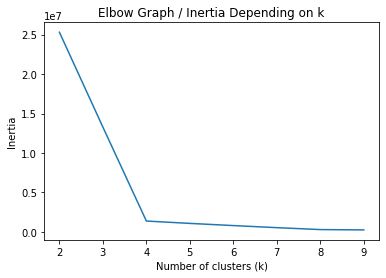

In [324]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
km_inertias, km_scores = [], []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

# Plotting the elbow graph
sns.lineplot(x=range(2, 10), y=km_inertias)
plt.title('Elbow Graph / Inertia Depending on k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


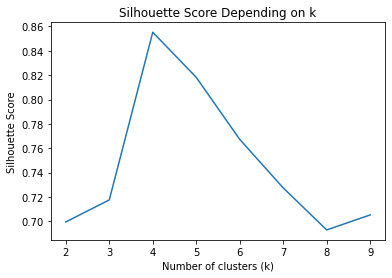

In [325]:
# Plotting the silhouette scores
sns.lineplot(x=range(2, 10), y=km_scores)
plt.title('Silhouette Score Depending on k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [329]:
km = KMeans(n_clusters=4).fit(X)
labels = km.labels_
accuracy= silhouette_score(X, labels)
print("Accuracy:",accuracy)

Accuracy: 0.855266391733493


In [330]:
df['Cluster'] = km.fit_predict(X)

In [331]:
# Calculate the statistical summary for each cluster
cluster_summary = df.groupby('Cluster').describe().transpose()

# Print the clusters and their statistical summary
print("Cluster Labels:")
print(df[['Recency', 'Frequency', 'Monetary', 'Cluster']])
print("\nStatistical Summary by Cluster:")
print(cluster_summary)

Cluster Labels:
      Recency  Frequency   Monetary  Cluster
0        2722          5  1148.7800        1
1        2722          5  1148.7800        1
2        2403          9  1119.4830        0
3        2413         15  2602.5755        3
4        2413         15  2602.5755        3
...       ...        ...        ...      ...
9989     2586         17  9133.9900        1
9990     2400         13  4531.6460        0
9991     2400         13  4531.6460        0
9992     2400         13  4531.6460        0
9993     2404         22  3913.4180        0

[9993 rows x 4 columns]

Statistical Summary by Cluster:
Cluster                  0            1            2            3
Sales   count  2648.000000  2494.000000  2484.000000  2367.000000
        mean    210.793104   231.999398   227.762980   251.106721
        std     458.514787   647.287434   727.850259   638.026622
        min       0.836000     0.898000     0.852000     0.444000
        25%      18.240000    17.490000    15.978000    